# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
5,5,0.899,0.0,0.0,1.0,0.0,126.0,no
6,6,4.962,0.0,0.0,0.0,0.0,84.0,no
7,7,4.858,0.0,1.0,0.0,0.0,17.0,no
8,8,4.962,0.0,0.0,0.0,0.0,704.0,yes
9,9,4.865,0.0,0.0,0.0,0.0,185.0,no


In [3]:
data = raw_data.copy()
data['y'] = raw_data['y'].map({'yes': 1, 'no': 0})
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0
5,5,0.899,0.0,0.0,1.0,0.0,126.0,0
6,6,4.962,0.0,0.0,0.0,0.0,84.0,0
7,7,4.858,0.0,1.0,0.0,0.0,17.0,0
8,8,4.962,0.0,0.0,0.0,0.0,704.0,1
9,9,4.865,0.0,0.0,0.0,0.0,185.0,0


In [4]:
data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:                  0.2121
Time:                        18:57:41   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

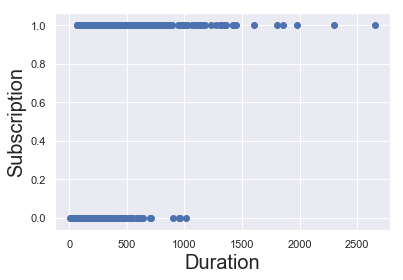

In [8]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Find the odds of duration

In [7]:
np.exp(0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression. 

Note that we could have inferred that from the coefficient itself.

Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.